In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

In [212]:
#Import users data
dt_users = pd.read_csv("users.csv")
dt_users = dt_users.iloc[:, :-8]

#One hot gender into binary features and convert user_id so it starts from 0
dt_users = pd.get_dummies(dt_users, columns=['gender'], drop_first=True)
dt_users['user_id'] = dt_users['user_id'].apply(lambda x: x-1)
dt_users

,user_id,age,latitude,longitude,interest_sports,interest_arts,interest_travel,interest_edu,gender_P
0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
1,1,37,-6.377776,106.919808,0.5,0.8,0.4,0.4,0
2,2,30,-7.839328,111.394950,0.3,0.2,0.0,0.0,0
3,3,46,-7.777849,107.037494,0.5,0.4,1.0,1.0,0
4,4,15,-6.533740,106.865799,0.1,0.4,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
95,95,50,-6.485163,107.362126,0.5,0.8,0.0,0.0,0
96,96,39,-6.617905,109.939346,0.5,1.0,0.6,1.0,0
97,97,54,-7.016094,110.718168,0.3,0.8,0.8,0.6,0
98,98,33,-6.725911,111.560163,0.5,0.0,0.2,0.2,1


In [40]:
#import activities data
dt_activities = pd.read_csv("activities.csv")

#Convert date from string type into date type, then extract weekend binary feature from date variable
dt_activities["date"] = dt_activities["date"].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
dt_activities["weekend"] = dt_activities["date"].apply(lambda x: 1 if x.weekday() in [5,6] else 0)

#Convert act_id so that it starts from 0 and one-hot the community variable into binary features
dt_activities['act_id'] = dt_activities['act_id'].apply(lambda x: x-1)
dt_activities = pd.get_dummies(dt_activities, columns=['community'], drop_first=True)

#Drop unnecessary features
dt_activities = dt_activities.drop(columns = ['date', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
dt_activities

,act_id,latitude,longitude,duration,daytime_binary,sports,arts,travel,edu,weekend,community_Influencer,community_JTP Group,community_Komunitas Dokter,community_LebaRun,community_Pelajar Pasundan,community_Pemuda Jakarta,community_RPTRA Taman Apel,community_Wahooo
0,0,-6.903441,107.615966,120,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,-6.220739,106.804537,180,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,-6.920260,107.634990,300,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,-6.859976,107.462859,300,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,4,-6.900136,107.618731,180,1,1,0,0,0,1,0,0,0,1,0,0,0,0
5,5,-6.169303,106.899211,120,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,6,-7.887840,112.529555,300,1,0,0,1,0,1,0,1,0,0,0,0,0,0
7,7,-6.174718,106.790097,300,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8,8,-6.170485,106.784437,240,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9,9,-6.895688,107.610656,120,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [201]:
#Import interaction matrix data and drop unnecessary collumns
dt_interact = pd.read_csv("mat_interaksi.csv")
dt_interact = dt_interact.iloc[:,1:]

#Replace all 0.5-valued cells to 1.0
dt_interact

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,1,1,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
96,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
97,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
#Transform the matrix structure into tabularized structure (stacking) and convert the act_id so that it starts from 0
dt_interact = dt_interact.stack(dropna=True).reset_index().rename(columns={"level_0":"user_id", "level_1":"act_id", 0:"y"})
dt_interact['act_id'] = dt_interact['act_id'].apply(lambda x: int(x)-1)

# dt_interact = pd.get_dummies(dt_interact, columns=['y'])
# dt_interact.rename(columns = {'y_0.0':'no', 'y_1.0':'yes'}, inplace = True)
dt_interact

,user_id,act_id,y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
3195,99,27,0
3196,99,28,0
3197,99,29,0
3198,99,30,0


In [187]:
#Merge (left join) both the activities and user dataframe into the interaction dataframe
dt_interact = dt_interact.merge(dt_activities, how="left", left_on="act_id", right_on="act_id")
dt_interact = dt_interact.merge(dt_users, how="left", left_on="user_id", right_on="user_id")
dt_interact

,user_id,act_id,y,latitude_x,longitude_x,duration,daytime_binary,sports,arts,travel,...,community_RPTRA Taman Apel,community_Wahooo,age,latitude_y,longitude_y,interest_sports,interest_arts,interest_travel,interest_edu,gender_P
0,0,0,0,-6.903441,107.615966,120,1,1,0,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
1,0,1,0,-6.220739,106.804537,180,0,0,1,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
2,0,2,0,-6.920260,107.634990,300,1,0,0,1,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
3,0,3,0,-6.859976,107.462859,300,1,1,0,1,...,0,1,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
4,0,4,0,-6.900136,107.618731,180,1,1,0,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,99,27,0,-6.208089,106.833231,120,1,1,0,0,...,1,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3196,99,28,0,-8.410701,116.458379,1440,0,1,0,1,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3197,99,29,0,-6.989897,110.422348,120,1,0,0,0,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3198,99,30,0,-6.858606,107.636549,120,0,0,1,0,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0


In [188]:
#Slice the collumns into the array accordingly
y = dt_interact.iloc[:,2:3].values
xact = dt_interact.iloc[:,3:-8].values
xuser = dt_interact.iloc[:,-8:].values

print(f"dt_users shape : {xuser.shape}")
print(f"dt_activities shape : {xact.shape}")
print(f"y shape : {y.shape}")

dt_users shape : (3200, 8)
dt_activities shape : (3200, 17)
y shape : (3200, 1)


In [189]:
#Standardize the x features (Y is not scaled for now)
scalerAct = StandardScaler()
scalerAct.fit(xact)
xact = scalerAct.transform(xact)

scalerUser = StandardScaler()
scalerUser.fit(xuser)
xuser = scalerUser.transform(xuser)

# scalerTarget = StandardScaler()
# scalerTarget.fit(y)
# y = scalerTarget.transform(y)

In [190]:
#Check the proportion of the classes in the sample
print("% of y = 0: ", (y[y == 0].shape[0])/y.shape[0]*100)
# print("% of y = Bucket: ", (y[y[:,1] == 1].shape[0])/y.shape[0]*100)
print("% of y = Joined or Bucketlisted: ", (y[y == 1].shape[0])/y.shape[0]*100)

% of y = 0:  88.59375
% of y = Joined or Bucketlisted:  11.40625


In [191]:
xact_train, xact_test, xuser_train, xuser_test, y_train, y_test = train_test_split(xact, xuser, y,
                                                                                   train_size=0.80,
                                                                                   shuffle=True,
                                                                                   random_state=1,
                                                                                   stratify=y
                                                                                  )

# xuser_train, xuser_test = train_test_split(xuser, train_size=0.80, shuffle=True, random_state=1)
# y_train, y_test = train_test_split(y, train_size=0.80, shuffle=True, random_state=1)

print(f"act training data shape: {xact_train.shape}")
print(f"act test data shape: {xact_test.shape}")
print(f"user training data shape: {xuser_train.shape}")
print(f"user test data shape: {xuser_test.shape}")
print(f"y training data shape: {y_train.shape}")
print(f"y test data shape: {y_test.shape}")

act training data shape: (2560, 17)
act test data shape: (640, 17)
user training data shape: (2560, 8)
user test data shape: (640, 8)
y training data shape: (2560, 1)
y test data shape: (640, 1)


In [192]:
print("% of y_train = 0: ", (y_train[y_train == 0].shape[0])/y_train.shape[0]*100)
# print("% of y_train = Bucket: ", (y_train[y_train[:,1] == 1].shape[0])/y_train.shape[0]*100)
print("% of y_train = Joined or Bucketlisted: ", (y_train[y_train == 1].shape[0])/y_train.shape[0]*100)

print("\n% of y_test = 0: ", (y_test[y_test == 0].shape[0])/y_test.shape[0]*100)
# print("% of y_test = Bucket: ", (y_test[y_test[:,1] == 1].shape[0])/y_test.shape[0]*100)
print("% of y_test = Joined or Bucketlisted: ", (y_test[y_test == 1].shape[0])/y_test.shape[0]*100)

% of y_train = 0:  88.59375
% of y_train = Joined or Bucketlisted:  11.40625

% of y_test = 0:  88.59375
% of y_test = Joined or Bucketlisted:  11.40625


In [365]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([   
    
    tf.keras.layers.Dense(num_outputs, activation='relu'),
  
])

act_NN = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(num_outputs, activation='relu'),

])

num_user_features = xuser_train.shape[1] 
num_act_features = xact_train.shape[1]

input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_act = tf.keras.layers.Input(shape=(num_act_features))
va = act_NN(input_act)
va = tf.linalg.l2_normalize(va, axis=1)

# compute the dot product of the two vectors vu and va
dot = tf.keras.layers.Dot(axes=1)([vu, va])
o_NN = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(32, activation='relu',
#                           kernel_regularizer = tf.keras.regularizers.L2(l2= 1.0),
#                           bias_regularizer = tf.keras.regularizers.L2(l2= 0.001)
                         ),
    tf.keras.layers.Dense(1, activation='sigmoid',
                          kernel_regularizer = tf.keras.regularizers.L2(l2= 10.0),
                          bias_regularizer = tf.keras.regularizers.L2(l2= 10.0)
                         ),

])
output = o_NN(dot)

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_act], output)

model.summary()

Model: "model_34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_65 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 input_66 (InputLayer)          [(None, 17)]         0           []                               
                                                                                                  
 sequential_96 (Sequential)     (None, 32)           288         ['input_65[0][0]']               
                                                                                                  
 sequential_97 (Sequential)     (None, 32)           576         ['input_66[0][0]']               
                                                                                           

In [366]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.BinaryFocalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.001)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
auc = tf.keras.metrics.AUC(name="auc")
model.compile(optimizer=opt,
              loss=cost_fn, metrics = auc
             )

In [367]:
tf.random.set_seed(1)
history = model.fit([xuser_train, xact_train],
                    y_train,
                    epochs=1000,
                    batch_size=16,
                    verbose=2,
                    validation_split = 0.2,
                    callbacks = [stop_early]
                   )

Epoch 1/1000
128/128 - 1s - loss: 7.9828 - auc: 0.5776 - val_loss: 4.3002 - val_auc: 0.4912 - 599ms/epoch - 5ms/step
Epoch 2/1000
128/128 - 0s - loss: 2.5539 - auc: 0.6285 - val_loss: 1.3386 - val_auc: 0.5244 - 115ms/epoch - 895us/step
Epoch 3/1000
128/128 - 0s - loss: 0.8145 - auc: 0.6407 - val_loss: 0.4637 - val_auc: 0.5406 - 115ms/epoch - 900us/step
Epoch 4/1000
128/128 - 0s - loss: 0.3251 - auc: 0.6422 - val_loss: 0.2343 - val_auc: 0.5690 - 116ms/epoch - 908us/step
Epoch 5/1000
128/128 - 0s - loss: 0.2016 - auc: 0.6591 - val_loss: 0.1799 - val_auc: 0.5198 - 118ms/epoch - 919us/step
Epoch 6/1000
128/128 - 0s - loss: 0.1732 - auc: 0.6579 - val_loss: 0.1677 - val_auc: 0.5453 - 119ms/epoch - 932us/step
Epoch 7/1000
128/128 - 0s - loss: 0.1665 - auc: 0.6556 - val_loss: 0.1641 - val_auc: 0.5518 - 119ms/epoch - 928us/step
Epoch 8/1000
128/128 - 0s - loss: 0.1640 - auc: 0.6562 - val_loss: 0.1618 - val_auc: 0.5606 - 115ms/epoch - 901us/step
Epoch 9/1000
128/128 - 0s - loss: 0.1617 - auc: 0.

Epoch 70/1000
128/128 - 0s - loss: 0.0954 - auc: 0.7838 - val_loss: 0.0893 - val_auc: 0.7407 - 117ms/epoch - 915us/step
Epoch 71/1000
128/128 - 0s - loss: 0.0953 - auc: 0.7772 - val_loss: 0.0907 - val_auc: 0.7416 - 117ms/epoch - 917us/step
Epoch 72/1000
128/128 - 0s - loss: 0.0948 - auc: 0.7858 - val_loss: 0.0879 - val_auc: 0.7418 - 117ms/epoch - 911us/step
Epoch 73/1000
128/128 - 0s - loss: 0.0948 - auc: 0.7788 - val_loss: 0.0878 - val_auc: 0.7438 - 119ms/epoch - 929us/step
Epoch 74/1000
128/128 - 0s - loss: 0.0949 - auc: 0.7762 - val_loss: 0.0876 - val_auc: 0.7460 - 117ms/epoch - 914us/step
Epoch 75/1000
128/128 - 0s - loss: 0.0941 - auc: 0.7899 - val_loss: 0.0874 - val_auc: 0.7451 - 118ms/epoch - 919us/step
Epoch 76/1000
128/128 - 0s - loss: 0.0942 - auc: 0.7862 - val_loss: 0.0875 - val_auc: 0.7492 - 118ms/epoch - 925us/step
Epoch 77/1000
128/128 - 0s - loss: 0.0938 - auc: 0.7814 - val_loss: 0.0883 - val_auc: 0.7419 - 116ms/epoch - 903us/step
Epoch 78/1000
128/128 - 0s - loss: 0.093

Epoch 138/1000
128/128 - 0s - loss: 0.0852 - auc: 0.8397 - val_loss: 0.0805 - val_auc: 0.7763 - 120ms/epoch - 934us/step
Epoch 139/1000
128/128 - 0s - loss: 0.0846 - auc: 0.8455 - val_loss: 0.0801 - val_auc: 0.7758 - 119ms/epoch - 932us/step
Epoch 140/1000
128/128 - 0s - loss: 0.0841 - auc: 0.8536 - val_loss: 0.0802 - val_auc: 0.7724 - 119ms/epoch - 931us/step
Epoch 141/1000
128/128 - 0s - loss: 0.0845 - auc: 0.8451 - val_loss: 0.0813 - val_auc: 0.7712 - 120ms/epoch - 940us/step
Epoch 142/1000
128/128 - 0s - loss: 0.0842 - auc: 0.8453 - val_loss: 0.0815 - val_auc: 0.7720 - 117ms/epoch - 914us/step
Epoch 143/1000
128/128 - 0s - loss: 0.0844 - auc: 0.8520 - val_loss: 0.0842 - val_auc: 0.7785 - 115ms/epoch - 902us/step
Epoch 144/1000
128/128 - 0s - loss: 0.0840 - auc: 0.8463 - val_loss: 0.0801 - val_auc: 0.7736 - 117ms/epoch - 913us/step
Epoch 145/1000
128/128 - 0s - loss: 0.0836 - auc: 0.8539 - val_loss: 0.0801 - val_auc: 0.7760 - 124ms/epoch - 970us/step
Epoch 146/1000
128/128 - 0s - lo

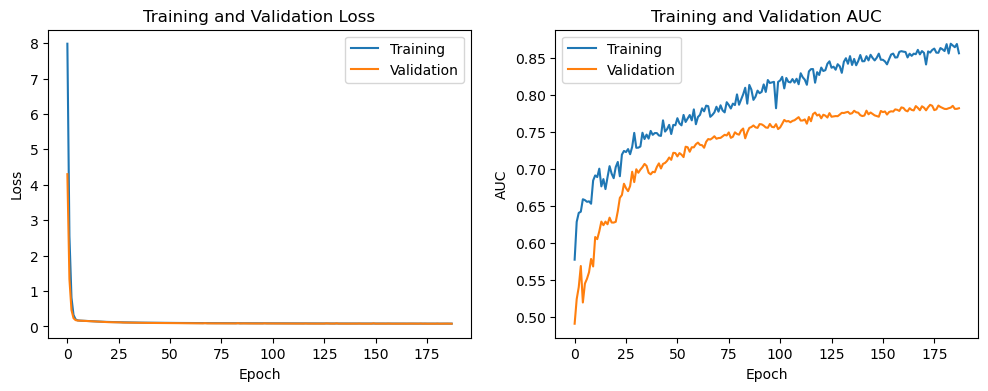

Best Model: Min Training Loss = 0.080, Min Validation Loss = 0.078
Best Model: Max Training AUC = 0.869, Max Validation AUC = 0.786


In [368]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
auc = history.history['auc']
val_auc = history.history['val_auc']

# Get number of epochs
epochs = range(len(loss))

# Plot training and validation loss per epoch
axs[0].plot(epochs, loss)
axs[0].plot(epochs, val_loss)
legend_drawn_flag = True
axs[0].legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

# Plot training and validation auc per epoch
axs[1].plot(epochs, auc)
axs[1].plot(epochs, val_auc)
axs[1].legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('AUC')
axs[1].set_title('Training and Validation AUC')

plt.show()

print('Best Model: Min Training Loss = {:.3f}, Min Validation Loss = {:.3f}'
      .format(min(loss), min(val_loss)))
print('Best Model: Max Training AUC = {:.3f}, Max Validation AUC = {:.3f}'
      .format(max(auc), max(val_auc)))

In [369]:
y_out = model.predict([xuser_test, xact_test])

zmax=0
jopt=0

for j in np.arange(0.25, 0.5, 0.01):
    y_pred = np.array([1 if i >= j else 0 for i in y_out])
    z = f1_score(y_test, y_pred, average='weighted', zero_division = 0)
    if z >= zmax:
        zmax = z
        jopt = j

print(jopt)

y_pred = np.array([1 if i >= jopt else 0 for i in y_out])
cr = classification_report(y_test, y_pred, zero_division = 0)
print(cr)

20/20 [==============================] - 0s 608us/step
0.41000000000000014
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       567
           1       0.44      0.42      0.43        73

    accuracy                           0.87       640
   macro avg       0.68      0.68      0.68       640
weighted avg       0.87      0.87      0.87       640

